In [1]:
import pandas as pd

pf = pd.read_json("price.json")
print(pf.keys)
print(pf['dataset']['column_names'])
print(pf['dataset']['data'])
print(len(pf['dataset']['data']))

<bound method NDFrame.keys of                                                                  dataset
collapse                                                            None
column_index                                                        None
column_names           [Date, Open, High, Low, Last, Change, Settle, ...
data                   [[2018-04-05, 24250.0, 24596.0, 24234.0, 24480...
database_code                                                      CHRIS
database_id                                                          596
dataset_code                                                     CME_YM1
description            Historical Futures Prices: E-mini Dow ($5) Fut...
end_date                                                      2018-04-05
frequency                                                          daily
id                                                              10981347
limit                                                               None
name                 

In [2]:
# contruct training data, settle_y is next day settle price y
original_data = pd.DataFrame(columns= pf['dataset']['column_names'], data = pf['dataset']['data'])
# original_data = original_data.sort_index(axis=1 ,ascending=True)
original_data = original_data.iloc[::-1]
original_data.index = range(len(original_data))

y = original_data.loc[1:2630, ['Settle']]
y.index = range(len(y))

# train_data = pd.concat([original_data, y], axis=1)
train_data = pd.merge(original_data,y , left_index=True, right_index=True)
train_data.drop(['Change'], axis = 1, inplace = True, errors = 'ignore')
train_data

Date     Open     High      Low     Last  Settle_x    Volume  \
0     2007-10-01  13981.0  14198.0  13963.0  14157.0  14157.00  126582.0   
1     2007-10-02  14152.0  14191.0  14092.0  14106.0  14106.00  164099.0   
2     2007-10-03  14106.0  14116.0  14024.0  14052.0  14052.00  124265.0   
3     2007-10-04  14057.0  14090.0  14026.0  14041.0  14041.00  131584.0   
4     2007-10-05  14029.0  14204.0  14025.0  14156.0  14156.00   87204.0   
5     2007-10-08  14147.0  14164.0  14086.0  14112.0  14112.00  137314.0   
6     2007-10-09  14119.0  14248.0  14095.0  14237.0  14237.00   68308.0   
7     2007-10-10  14228.0  14234.0  14076.0  14142.0  14142.00  126670.0   
8     2007-10-11  14144.0  14267.0  14015.0  14086.0  14086.00  147329.0   
9     2007-10-12  14076.0  14193.0  14038.0  14179.0  14179.00  223193.0   
10    2007-10-15  14183.0  14205.0  13967.0  14066.0  14066.00  141927.0   
11    2007-10-16  14064.0  14085.0  13937.0  13972.0  13972.00  177237.0   
12    2007-10-17  14012.0  14078.0  13831.0  13967.0  13967.00  175258.0   
13    2007-10-18  13963.0  13984.0  13878.0  13940.0  13940.00  215865.0   
14    2007-10-19  13957.0  13957.0  13521.0  13560.0  13560.00  142182.0   
15    2007-10-22  13532.0  13637.0  13412.0  13610.0  13610.00  274198.0   
16    2007-10-23  13639.0  13727.0  13584.0  13707.0  13707.00  239618.0   
17    2007-10-24  13675.0  13733.0  13505.0  13706.0  13706.00  181589.0   
18    2007-10-25  13729.0  13776.0  13582.0  13739.0  13739.00  272458.0   
19    2007-10-26  13748.0  13874.0  13710.0  13848.0  13848.00  225195.0   
20    2007-10-29  13855.0  13932.0  13855.0  13907.0  13907.00  151787.0   
21    2007-10-30  13900.0  13900.0  13808.0  13822.0  13822.00  104263.0   
22    2007-10-31  13812.0  13994.0  13792.0  13936.0  13936.00  103311.0   
23    2007-11-02  13605.0  13685.0  13467.0  13642.0  13642.00  229033.0   
24    2007-11-05  13589.0  13640.0  13467.0  13555.0  13555.00  271643.0   
25    2007-11-06  13559.0  13690.0  13532.0  13677.0  13677.00  218660.0   
26    2007-11-07  13662.0  13662.0  13297.0  13355.0  13355.00  173923.0   
27    2007-11-08  13293.0  13430.0  13096.0  13262.0  13262.00  273390.0   
28    2007-11-09  13278.0  13311.0  13013.0  13047.0  13047.00  351038.0   
29    2007-11-12  13048.0  13178.0  12976.0  12990.0  12990.00  292700.0   
...          ...      ...      ...      ...      ...       ...       ...   
2600  2018-02-21  24951.0  25257.0  24724.0  24778.0  24782.00  254310.0   
2601  2018-02-22  24783.0  25137.0  24576.0  25031.0  25013.00  276284.0   
2602  2018-02-23  25019.0  25325.0  24996.0  25300.0  25314.00  203948.0   
2603  2018-02-26  25328.0  25774.0  25300.0  25759.0  25758.00  189537.0   
2604  2018-02-27  25758.0  25813.0  25388.0  25427.0  25429.00  308510.0   
2605  2018-02-28  25411.0  25577.0  25018.0  25090.0  25038.00  270530.0   
2606  2018-03-01  25090.0  25185.0  24431.0  24638.0  24620.00  450881.0   
2607  2018-03-02  24616.0  24670.0  24204.0  24539.0  24535.00  397142.0   
2608  2018-03-05  24483.0  24955.0  24311.0  24881.0  24864.00  309660.0   
2609  2018-03-06  24885.0  25047.0  24695.0  24851.0  24852.00  262663.0   
2610  2018-03-07  24659.0  24845.0  24410.0  24790.0  24795.00  313894.0   
2611  2018-03-08  24784.0  24956.0  24704.0  24886.0  24892.00  228978.0   
2612  2018-03-09  24879.0  25346.0  24841.0  25340.0  25335.00  153047.0   
2613  2018-03-12  25335.0  25510.0  25151.0  25206.0  25208.00  116773.0   
2614  2018-03-13  25196.0  25378.0  24945.0  25010.0  25027.00  102167.0   
2615  2018-03-14  24985.0  25153.0  24670.0  24784.0  24770.00   83440.0   
2616  2018-03-15  24784.0  25059.0  24675.0  24938.0  24907.00   60747.0   
2617  2018-03-16  24921.0  24948.0  24823.0  24881.0  24879.17    2557.0   
2618  2018-03-19  24976.0  24984.0  24461.0  24675.0  24691.00  272836.0   
2619  2018-03-20  24671.0  24813.0  24608.0  24774.0  24765.00  190952.0   
2620  2018-03-21  24769.0  24998.0  24660.0  24728.0  24727.

In [3]:
import pandas as pd
sentiment = pd.read_csv("mean_sentiment14_date.csv")
sentiment.columns=['Date','neg','neu','pos','compound']
sentiment

Date     neg     neu     pos  compound
0     2011-12-26  0.1316  0.7986  0.0699  -0.22393
1     2011-12-27  0.0928  0.8173  0.0901   0.06701
2     2011-12-28  0.1055  0.8434  0.0509  -0.19519
3     2011-12-29  0.1509  0.8358  0.0132  -0.23619
4     2011-12-30  0.1047  0.8389  0.0564  -0.13520
5     2011-12-31  0.1224  0.7984  0.0793  -0.05395
6     2012-01-01  0.1673  0.7635  0.0693  -0.22919
7     2012-01-02  0.1994  0.7566  0.0440  -0.41134
8     2012-01-03  0.1593  0.8201  0.0206  -0.33805
9     2012-01-04  0.1741  0.8038  0.0221  -0.24281
10    2012-01-05  0.2186  0.7276  0.0537  -0.38887
11    2012-01-06  0.1343  0.8206  0.0450  -0.23281
12    2012-01-07  0.1825  0.7515  0.0661  -0.19485
13    2012-01-08  0.1756  0.7762  0.0480  -0.28807
14    2012-01-09  0.1853  0.7026  0.1121  -0.15282
15    2012-01-10  0.1867  0.7517  0.0616  -0.38912
16    2012-01-11  0.0434  0.8943  0.0623   0.02702
17    2012-01-12  0.1328  0.8032  0.0640  -0.14211
18    2012-01-13  0.1007  0.8331  0.0663  -0.07778
19    2012-01-14  0.1138  0.7417  0.1445  -0.04549
20    2012-01-15  0.1651  0.7003  0.1348  -0.09491
21    2012-01-16  0.1525  0.7897  0.0579  -0.20628
22    2012-01-17  0.1257  0.8187  0.0558  -0.12339
23    2012-01-18  0.1197  0.7934  0.0869  -0.05640
24    2012-01-19  0.2223  0.7506  0.0271  -0.28812
25    2012-01-20  0.1742  0.7352  0.0905  -0.19602
26    2012-01-21  0.1203  0.8382  0.0415  -0.32834
27    2012-01-22  0.1598  0.7723  0.0680  -0.12253
28    2012-01-23  0.1824  0.7650  0.0527  -0.24584
29    2012-01-24  0.1545  0.7729  0.0726  -0.28032
...          ...     ...     ...     ...       ...
2271  2018-03-15  0.2735  0.6629  0.0638  -0.35954
2272  2018-03-16  0.0970  0.7901  0.1130  -0.03306
2273  2018-03-17  0.1571  0.7743  0.0687  -0.17443
2274  2018-03-18  0.1746  0.7621  0.0633  -0.27514
2275  2018-03-19  0.1282  0.7849  0.0869  -0.06474
2276  2018-03-20  0.1158  0.8187  0.0655  -0.15053
2277  2018-03-21  0.1486  0.8354  0.0160  -0.20886
2278  2018-03-22  0.3807  0.6193  0.0000  -0.58831
2279  2018-03-23  0.1328  0.8218  0.0453  -0.17221
2280  2018-03-24  0.1237  0.7993  0.0770  -0.08462
2281  2018-03-25  0.2480  0.6953  0.0568  -0.31635
2282  2018-03-26  0.1917  0.7680  0.0402  -0.28184
2283  2018-03-27  0.1918  0.7977  0.0105  -0.33007
2284  2018-03-28  0.2131  0.7016  0.0854  -0.27523
2285  2018-03-29  0.0668  0.8695  0.0637   0.04495
2286  2018-03-30  0.2003  0.7216  0.0780  -0.21031
2287  2018-03-31  0.2263  0.6541  0.1196  -0.17401
2288  2018-04-01  0.1877  0.7804  0.0318  -0.35547
2289  2018-04-02  0.1202  0.8130  0.0669  -0.10667
2290  2018-04-03  0.1457  0.7274  0.1269  -0.11664
2291  2018-04-04  0.0917  0.8444  0.0639  -0.06000
2292  2018-04-05  0.1458  0.7960  0.0581  -0.12365
2293  2018-04-06  0.1803  0.7864  0.0333  -0.31217
2294  2018-04-07  0.1292  0.8269  0.0439  -0.21204
2295  2018-04-08  0.2209  0.7567  0.0222  -0.36989
2296  2018-04-09  0.1098  0.7770  0.1132  -0.10704
2297  2018-04-10  0.2074  0.7501  0.0425  -0.24805
2298  2018-04-11  0.2152  0.7537  0.0311  -0.31850
2299  2018-04-12  0.2159  0.7408  0.0433  -0.29647
2300  2018-04-13  0.2336  0.7202  0.0462  -0.36933

[2301 rows x 5 columns]

In [4]:
a = sentiment.merge(train_data, on='Date', how='left')
a
sentiment_combine = a.dropna(how='any')
sentiment_combine.index = range(len(sentiment_combine))
sentiment_combine = sentiment_combine.drop(["Settle_x","Open", "High", "Low", "Last", "Volume", "Previous Day Open Interest"],axis=1)
sentiment_combine

Date     neg     neu     pos  compound  Settle_y
0     2012-11-13  0.0976  0.8766  0.0258  -0.23890  12544.00
1     2012-11-14  0.1501  0.8095  0.0404  -0.25605  12522.00
2     2012-11-15  0.1332  0.7952  0.0716  -0.19940  12570.00
3     2012-11-16  0.1469  0.8045  0.0487  -0.21828  12738.00
4     2012-11-19  0.2267  0.7021  0.0712  -0.31749  12759.00
5     2012-11-20  0.1351  0.7699  0.0950  -0.07062  12800.00
6     2012-11-21  0.1228  0.7683  0.1089   0.04511  12961.00
7     2012-11-23  0.1791  0.7749  0.0460  -0.20363  12936.00
8     2012-11-26  0.0941  0.8235  0.0824   0.04249  12862.00
9     2012-11-27  0.1517  0.8031  0.0452  -0.20032  12957.00
10    2012-11-28  0.1733  0.7966  0.0300  -0.36568  13021.00
11    2012-11-29  0.0527  0.7843  0.1628   0.25013  13008.00
12    2012-11-30  0.0711  0.8186  0.1103   0.12341  12950.00
13    2012-12-03  0.1128  0.7480  0.1392   0.05820  12933.00
14    2012-12-04  0.1155  0.8192  0.0653  -0.13956  13024.00
15    2012-12-05  0.2143  0.7620  0.0237  -0.44485  13063.00
16    2012-12-06  0.1296  0.7994  0.0710  -0.10557  13143.00
17    2012-12-07  0.2401  0.7143  0.0458  -0.42306  13187.00
18    2012-12-10  0.1371  0.7909  0.0720  -0.21316  13278.00
19    2012-12-11  0.0766  0.8599  0.0636  -0.04091  13230.00
20    2012-12-12  0.2238  0.7611  0.0151  -0.31805  13157.00
21    2012-12-13  0.1243  0.8331  0.0426  -0.21588  13150.00
22    2012-12-14  0.2549  0.6995  0.0456  -0.43120  13245.00
23    2012-12-17  0.1530  0.7944  0.0525  -0.28309  13329.00
24    2012-12-18  0.1535  0.8108  0.0357  -0.28895  13268.00
25    2012-12-19  0.1176  0.8291  0.0533  -0.24895  13322.00
26    2012-12-20  0.1931  0.7545  0.0524  -0.28657  13249.52
27    2012-12-21  0.2119  0.7482  0.0399  -0.35047  13065.00
28    2012-12-24  0.1995  0.7572  0.0434  -0.36153  13048.00
29    2012-12-26  0.1010  0.8623  0.0367  -0.23175  13003.00
...          ...     ...     ...     ...       ...       ...
1324  2018-02-21  0.1729  0.7385  0.0887  -0.21500  25013.00
1325  2018-02-22  0.1499  0.7700  0.0801  -0.14026  25314.00
1326  2018-02-23  0.1818  0.7951  0.0231  -0.31358  25758.00
1327  2018-02-26  0.1308  0.7762  0.0929  -0.08129  25429.00
1328  2018-02-27  0.1926  0.7462  0.0612  -0.26685  25038.00
1329  2018-02-28  0.1540  0.7546  0.0914  -0.12444  24620.00
1330  2018-03-01  0.1890  0.7683  0.0427  -0.24156  24535.00
1331  2018-03-02  0.1722  0.8027  0.0251  -0.34947  24864.00
1332  2018-03-05  0.0734  0.8881  0.0385  -0.07532  24852.00
1333  2018-03-06  0.1488  0.8149  0.0363  -0.24245  24795.00
1334  2018-03-07  0.1149  0.8335  0.0515  -0.16611  24892.00
1335  2018-03-08  0.1093  0.8569  0.0338  -0.12713  25335.00
1336  2018-03-09  0.2321  0.7507  0.0172  -0.33882  25208.00
1337  2018-03-12  0.1990  0.7527  0.0483  -0.28139  25027.00
1338  2018-03-13  0.2184  0.7124  0.0692  -0.26679  24770.00
1339  2018-03-14  0.2393  0.7164  0.0443  -0.36527  24907.00
1340  2018-03-15  0.2735  0.6629  0.0638  -0.35954  24879.17
1341  2018-03-16  0.0970  0.7901  0.1130  -0.03306  24691.00
1342  2018-03-19  0.1282  0.7849  0.0869  -0.06474  24765.00
1343  2018-03-20  0.1158  0.8187  0.0655  -0.15053  24727.00
1344  2018-03-21  0.1486  0.8354  0.0160  -0.20886  23963.00
1345  2018-03-22  0.3807  0.6193  0.0000  -0.58831  23612.00
1346  2018-03-23  0.1328  0.8218  0.0453  -0.17221  24191.00
1347  2018-03-26  0.1917  0.7680  0.0402  -0.28184  23859.00
1348  2018-03-27  0.1918  0.7977  0.0105  -0.33007  23860.00
1349  2018-03-28  0.2131  0.7016  0.0854  -0.27523  24147.00
1350  2018-03-29  0.0668  0.8695  0.0637   0.04495  23552.00
1351  2018-04-02  0.1202  0.8130  0.0669  -0.10667  23984.00
1352  2018-04-03  0.1457  0.7274  0.1269  -0.11664  24265.00
1353  2018-04-04  0.0917  0.8444  0.0639  -0.06000  24468.00

[1354 rows x 6 columns]

In [7]:
import numpy as np
import tensorflow as tf

#define constant variable, hidden layer units and learn rate
rnn_unit=10      
input_size=4      
output_size=1
lr=0.0006    

#getData
data=sentiment_combine.iloc[:,1:6].values
data


array([[  9.76000000e-02,   8.76600000e-01,   2.58000000e-02,
         -2.38900000e-01,   1.25440000e+04],
       [  1.50100000e-01,   8.09500000e-01,   4.04000000e-02,
         -2.56050000e-01,   1.25220000e+04],
       [  1.33200000e-01,   7.95200000e-01,   7.16000000e-02,
         -1.99400000e-01,   1.25700000e+04],
       ..., 
       [  1.20200000e-01,   8.13000000e-01,   6.69000000e-02,
         -1.06670000e-01,   2.39840000e+04],
       [  1.45700000e-01,   7.27400000e-01,   1.26900000e-01,
         -1.16640000e-01,   2.42650000e+04],
       [  9.17000000e-02,   8.44400000e-01,   6.39000000e-02,
         -6.00000000e-02,   2.44680000e+04]])

In [8]:
#get training set
def get_train_data(batch_size=60,time_step=20,train_begin=0,train_end=1000):
    batch_index=[]
    data_train=data[train_begin:train_end]
    # Stardardization
    normalized_train_data=(data_train-np.mean(data_train,axis=0))/np.std(data_train,axis=0)  
    train_x,train_y=[],[]   
    for i in range(len(normalized_train_data)-time_step):
       if i % batch_size==0:
           batch_index.append(i)
       x=normalized_train_data[i:i+time_step,:4]
       y=normalized_train_data[i:i+time_step,4,np.newaxis]
       train_x.append(x.tolist())
       train_y.append(y.tolist())
    batch_index.append((len(normalized_train_data)-time_step))
    return batch_index,train_x,train_y


#get test set
def get_test_data(time_step=20,test_begin=1300):
    data_test=data[test_begin:]
    mean=np.mean(data_test,axis=0)
    std=np.std(data_test,axis=0)
    normalized_test_data=(data_test-mean)/std  
    size=(len(normalized_test_data)+time_step-1)//time_step  #有size个sample
    test_x,test_y=[],[]
    for i in range(size-1):
       x=normalized_test_data[i*time_step:(i+1)*time_step,:4]
       y=normalized_test_data[i*time_step:(i+1)*time_step,4]
       test_x.append(x.tolist())
       test_y.extend(y)
    test_x.append((normalized_test_data[(i+1)*time_step:,:4]).tolist())
    test_y.extend((normalized_test_data[(i+1)*time_step:,4]).tolist())
    return mean,std,test_x,test_y


#define neural networks parameters
#define input/ouput weight, bias

weights={
         'in':tf.Variable(tf.random_normal([input_size,rnn_unit])),
         'out':tf.Variable(tf.random_normal([rnn_unit,1]))
        }
biases={
        'in':tf.Variable(tf.constant(0.1,shape=[rnn_unit,])),
        'out':tf.Variable(tf.constant(0.1,shape=[1,]))
       }

#LSTM
def lstm(X):
    
    batch_size=tf.shape(X)[0]
    time_step=tf.shape(X)[1]
    w_in=weights['in']
    b_in=biases['in']
    input=tf.reshape(X,[-1,input_size])  
    input_rnn=tf.matmul(input,w_in)+b_in
    input_rnn=tf.reshape(input_rnn,[-1,time_step,rnn_unit])  
    cell=tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(rnn_unit, reuse=tf.get_variable_scope().reuse)
    init_state=cell.zero_state(batch_size,dtype=tf.float32)
    with tf.variable_scope("rnn14_s", reuse = None):
        output_rnn,final_states=tf.nn.dynamic_rnn(cell, input_rnn,initial_state=init_state, dtype=tf.float32)
    output=tf.reshape(output_rnn,[-1,rnn_unit]) 
    w_out=weights['out']
    b_out=biases['out']
    pred=tf.matmul(output,w_out)+b_out
    return pred,final_states

#train LSTM

def train_lstm(batch_size=60,time_step=20,train_begin=1000,train_end=1300):
    X=tf.placeholder(tf.float32, shape=[None,time_step,input_size])
    Y=tf.placeholder(tf.float32, shape=[None,time_step,output_size])
    batch_index,train_x,train_y=get_train_data(batch_size,time_step,train_begin,train_end)
    with tf.variable_scope("sec_lstm14_s"):
        pred,_=lstm(X)
    loss=tf.reduce_mean(tf.square(tf.reshape(pred,[-1])-tf.reshape(Y, [-1])))
    train_op=tf.train.AdamOptimizer(lr).minimize(loss)
    saver=tf.train.Saver(tf.global_variables(),max_to_keep=15)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #number of iteration
        for i in range(1000):     
            for step in range(len(batch_index)-1):
                _,loss_=sess.run([train_op,loss],feed_dict={X:train_x[batch_index[step]:batch_index[step+1]],Y:train_y[batch_index[step]:batch_index[step+1]]})
            print("Number of iterations:",i," loss:",loss_)
        print("model_save: ",saver.save(sess,'modle14.ckpt'))
        print("The train has finished")
train_lstm()

Number of iterations: 999  loss: 0.315044
model_save:  modle14.ckpt
The train has finished


INFO:tensorflow:Restoring parameters from ./modle14.ckpt
PMSE: 0.031068202824


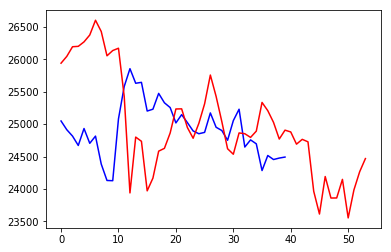

array([ 25048.65429688,  24913.76367188,  24815.17578125,  24670.6484375 ,
        24932.2890625 ,  24703.63476562,  24815.05078125,  24383.421875  ,
        24130.05078125,  24126.578125  ,  25080.83984375,  25580.87109375,
        25856.20703125,  25631.02734375,  25645.07226562,  25202.11914062,
        25230.54492188,  25474.51757812,  25329.77539062,  25255.8125    ,
        25018.88671875,  25146.34960938,  25023.81835938,  24894.66601562,
        24851.68359375,  24872.7109375 ,  25173.12890625,  24951.89648438,
        24901.265625  ,  24750.84179688,  25054.15039062,  25230.1171875 ,
        24646.34375   ,  24756.7734375 ,  24695.87109375,  24283.3046875 ,
        24515.69140625,  24453.38671875,  24475.95507812,  24491.54296875], dtype=float32)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf


# #LSTM
# def lstm(X):
    
#     batch_size=tf.shape(X)[0]
#     time_step=tf.shape(X)[1]
#     w_in=weights['in']
#     b_in=biases['in']
#     input=tf.reshape(X,[-1,input_size])  
#     input_rnn=tf.matmul(input,w_in)+b_in
#     input_rnn=tf.reshape(input_rnn,[-1,time_step,rnn_unit])  
#     cell=tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(rnn_unit, reuse = True)
#     init_state=cell.zero_state(batch_size,dtype=tf.float32)
#     output_rnn,final_states=tf.nn.dynamic_rnn(cell, input_rnn,initial_state=init_state, dtype=tf.float32)
#     output=tf.reshape(output_rnn,[-1,rnn_unit]) 
#     w_out=weights['out']
#     b_out=biases['out']
#     pred=tf.matmul(output,w_out)+b_out
#     return pred,final_states


# Model prediction
def prediction(time_step=20):
    X=tf.placeholder(tf.float32, shape=[None,time_step,input_size])
    mean,std,test_x,test_y=get_test_data(time_step)
    with tf.variable_scope("sec_lstm14_s",reuse=True):
        pred,_=lstm(X)
    saver=tf.train.Saver(tf.global_variables())
    with tf.Session() as sess:
        #read parameters
        module_file = tf.train.latest_checkpoint('./')
        saver.restore(sess, module_file)
        test_predict=[]
        for step in range(len(test_x)-1):
          prob=sess.run(pred,feed_dict={X:[test_x[step]]})
          predict=prob.reshape((-1))
          test_predict.extend(predict)
        test_y=np.array(test_y)*std[4]+mean[4]
        test_predict=np.array(test_predict)*std[4]+mean[4]
        acc=np.average(np.abs(test_predict-test_y[:len(test_predict)])/test_y[:len(test_predict)])  
        print("PMSE:",acc)
        
        plt.figure()
        plt.plot(list(range(len(test_predict))), test_predict, color='b',)
        plt.plot(list(range(len(test_y))), test_y,  color='r')
        plt.show()
    return test_predict

prediction()